Google Playstore Apps Dataset

Preprocessing

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
gapp = pd.read_excel('GooglePlaystore.xlsx')

In [2]:
#Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.
gapp.drop(gapp[gapp['Reviews'] == '3.0M'].index, inplace=True)
gapp['Reviews'] = gapp['Reviews'].astype('int')

In [3]:
#Remove rows where any of the columns has the value "Varies with device".
gapp.drop(gapp[gapp.eq('Varies with device').any(1)].index, inplace=True)

In [4]:
#The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number.
#If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). 
pattern = '(\d+\.\d)'
gapp['Android Ver'] = gapp['Android Ver'].str.extract(pattern)
gapp['Android Ver'] = gapp['Android Ver'].astype('float')
gapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [5]:
#The "Installs" column must have integer values. For values that have commas, remove the commas.
#For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.
gapp['Installs'] = gapp['Installs'].replace(['\+','\,'],'',regex=True)
gapp['Installs'] = gapp['Installs'].astype('int')
gapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0,9.6M,10,Free,0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1


In [6]:
#For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else,
#fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.
avg_rating = gapp['Rating'].groupby(gapp['Category']).mean().round(2)
nan_val = gapp[pd.isnull(gapp['Rating'])]
gapp.drop(nan_val[(nan_val['Reviews']< 100) & (nan_val['Installs'] < 50000)].index, inplace=True)
for row in gapp.iterrows():
    ser = row[1]
    for i, col in enumerate(ser.index):
        if col == 'Rating' and pd.isnull(ser.values[i]):
            gapp.loc[row[0], 'Rating'] = avg_rating[ser.get('Category')]
gapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [7]:
#Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.
gapp['Size'] = gapp['Size'].replace({'k': '*1e3','K': '*1e3', 'm': '*1e6', 'M': '*1e6'}, regex=True).map(pd.eval).astype('int')
gapp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,2017-03-26 00:00:00,1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195,582000,100000,Free,0,Everyone,Weather,2014-02-16 00:00:00,6,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000,1000,Free,0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7,2600000,500,Free,0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


In [8]:
#Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.
gapp['Rating'].groupby(gapp['Category']).describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


In [9]:
#Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. 
free = gapp[gapp['Type'] == 'Free']
rat = free['Rating'].groupby(free['Category']).nlargest(n= 3, keep= 'first').to_frame('count')
lst = []
for i in range(len(rat)):
    s= rat.index[i][1]
    lst.append(s)
a = gapp.loc[lst,['App','Category', 'Rating']]
a

,App,Category,Rating
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8
55,Tickets SDA 2018 and Exam from the State Traff...,AUTO_AND_VEHICLES,4.9
61,CDL Practice Test 2018 Edition,AUTO_AND_VEHICLES,4.9
...,...,...,...
4038,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,4.8
5244,AJ Player,VIDEO_PLAYERS,4.8
3627,Weather forecast,WEATHER,4.8
3629,Live Weather Pro,WEATHER,4.8


In [10]:
Ins = free['Installs'].groupby(free['Category']).nlargest(n= 3, keep= 'first').to_frame('count')
lst1 = []
for i in range(len(Ins)):
    s= Ins.index[i][1]
    lst1.append(s)
b = gapp.loc[lst1,['App','Category', 'Installs']]
b

,App,Category,Installs
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,10000000
19,ibis Paint X,ART_AND_DESIGN,10000000
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,10000000
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,10000000
69,Used cars for sale - Trovit,AUTO_AND_VEHICLES,5000000
...,...,...,...
4688,VivaVideo - Video Editor & Photo Movie,VIDEO_PLAYERS,100000000
3677,Vote for,VIDEO_PLAYERS,50000000
4725,Weather & Clock Widget for Android,WEATHER,50000000
3636,Weather –Simple weather forecast,WEATHER,10000000


In [11]:
rev = free['Reviews'].groupby(free['Category']).nlargest(n= 3, keep= 'first').to_frame('count')
lst2 = []
for i in range(len(rev)):
    s= rev.index[i][1]
    lst2.append(s)
c = gapp.loc[lst2,['App','Category', 'Reviews']]
c

,App,Category,Reviews
19,ibis Paint X,ART_AND_DESIGN,224399
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,194216
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,174531
79,Tickets + PDA 2018 Exam,AUTO_AND_VEHICLES,197136
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,186648
...,...,...,...
4038,"DU Recorder – Screen Recorder, Video Editor, Live",VIDEO_PLAYERS,2588730
4032,Dubsmash,VIDEO_PLAYERS,1971777
4725,Weather & Clock Widget for Android,WEATHER,2371543
5768,Amber Weather,WEATHER,260137


In [15]:
#Find the average, maximum and minimum price of the paid applications.
paid = gapp[gapp['Type'] == 'Paid']
avg = paid['Price'].mean()
mx = paid['Price'].max()
mini = paid['Price'].min()
print(avg)
print(mx)
print(mini)

15.139163763066062
400
0.99


Visualization

In [16]:
from matplotlib import pyplot as plt

[62, 85, 31, 116, 62, 40, 149, 246, 49, 210, 174, 585, 61, 474, 31, 36, 263, 86, 222, 58, 68, 280, 82, 196, 229, 41, 99, 330, 133, 264, 24, 95, 197, 55, 28, 114, 97, 18, 1, 116, 321, 170, 178, 234, 155, 633, 277, 232, 48, 49, 171, 94, 31]


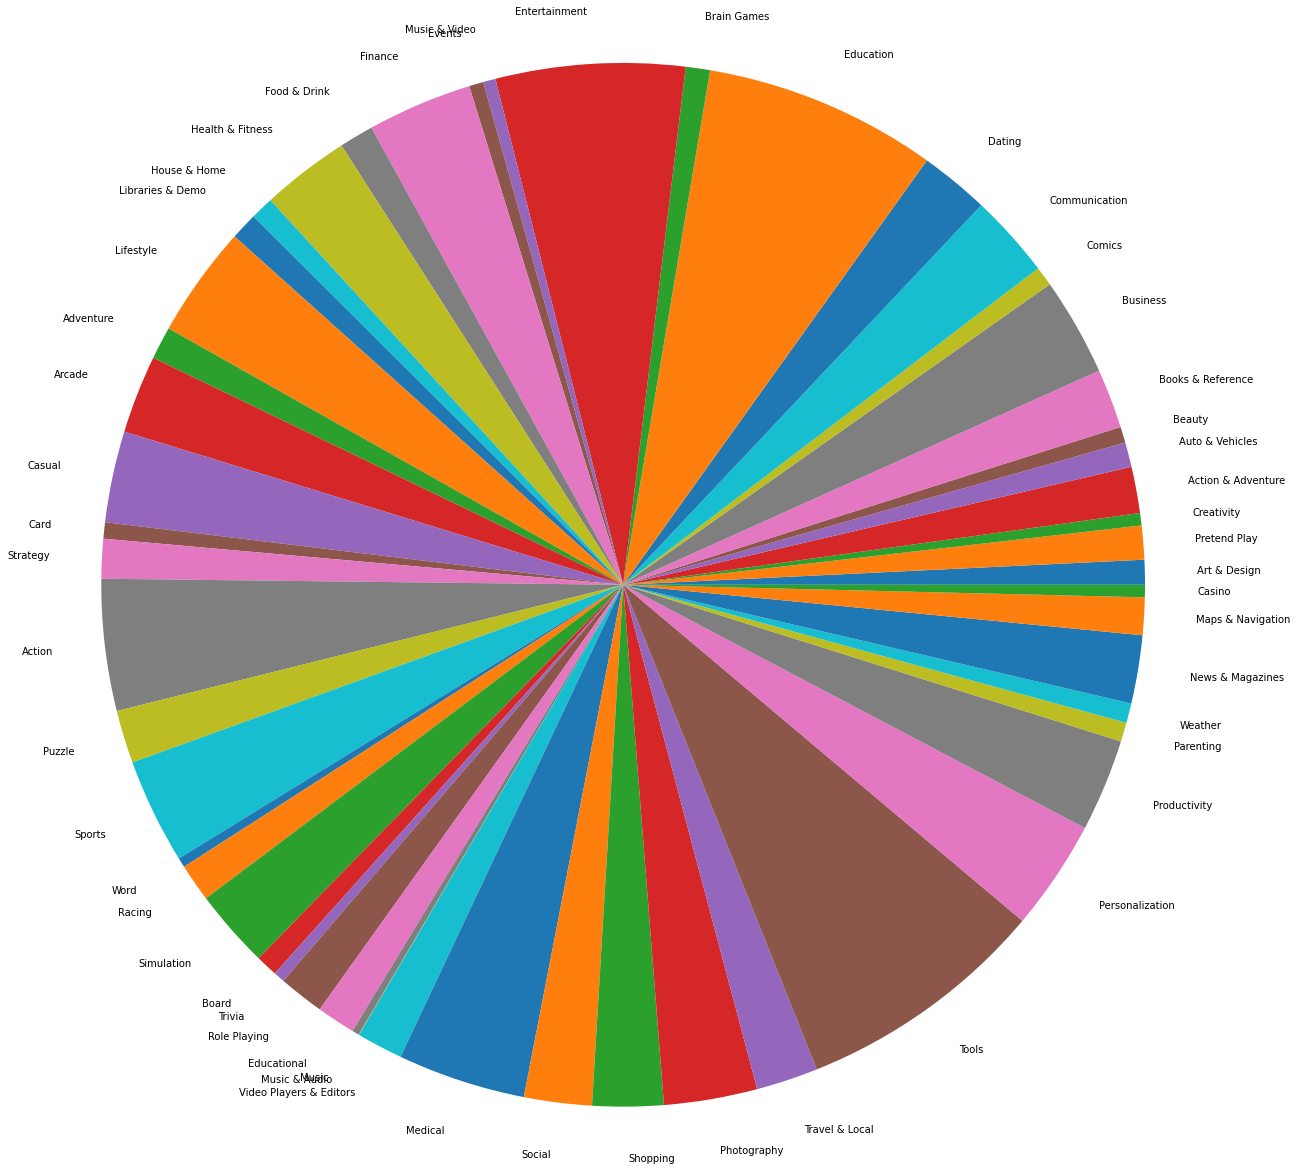

In [17]:
#In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
#Count the number of applications per genre and display it using a pie chart.
genre = gapp['Genres']
genre = genre.str.split(';')
al = genre.explode()
kind = al.unique()
num = []
for i in kind:
    count = 0
    for j in al:
        if i == j:
            count+=1
    num.append(count)
print(num)
plt.pie(x= num, labels= kind, radius=6 )
plt.show()

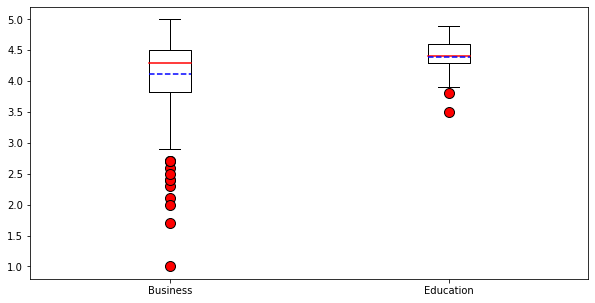

In [18]:
#Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.
bus = gapp[gapp['Category'] == 'BUSINESS']['Rating']
edu = gapp[gapp['Category'] == 'EDUCATION']['Rating']
b = []
e = []
for i in bus.values:
    b.append(i)
for j in edu.values:
    e.append(j)
lst = [b, e]
labels = 'Business','Education'
plt.figure(figsize=(10,5))
plt.boxplot(x= lst,medianprops={'color': 'red', 'linewidth': '1.5'}, meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 10}, meanline=True, showmeans=True, labels=labels )
plt.show()